In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm



In [ ]:
df = pd.read_csv('/content/Energy_consumption.csv')

In [ ]:
df.head(10)


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,hour,day,month,year,HVACUsage_On,LightingUsage_On,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_Yes
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,2.774699,75.364373,0,5,1,2022,True,False,True,False,False,False,False,False,False
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,21.831384,83.401855,1,5,1,2022,True,True,False,True,False,False,False,False,False
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,6.764672,78.270888,2,5,1,2022,False,False,False,False,True,False,False,False,False
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,8.623447,56.519850,3,5,1,2022,False,True,False,False,False,False,False,True,False
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,3.071969,70.811732,4,5,1,2022,True,False,False,False,False,False,False,False,False
5,2022-01-01 05:00:00,29.576037,36.824263,1871.709180,6,17.626690,84.321885,5,5,1,2022,False,False,False,False,True,False,False,False,True
6,2022-01-01 06:00:00,25.131167,35.709622,1607.001228,6,24.264702,76.165791,6,5,1,2022,True,False,False,False,False,False,False,False,True
7,2022-01-01 07:00:00,23.182844,31.679920,1633.955330,8,27.517099,74.131906,7,5,1,2022,False,False,False,False,False,True,False,False,True
8,2022-01-01 08:00:00,25.391999,46.399364,1240.309224,6,2.307595,78.206236,8,5,1,2022,True,False,False,False,True,False,False,False,False
9,2022-01-01 09:00:00,22.212549,32.418464,1705.420336,1,29.140071,77.992214,9,5,1,2022,True,False,False,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            1000 non-null   datetime64[ns]
 1   Temperature          1000 non-null   float64       
 2   Humidity             1000 non-null   float64       
 3   SquareFootage        1000 non-null   float64       
 4   Occupancy            1000 non-null   int64         
 5   RenewableEnergy      1000 non-null   float64       
 6   EnergyConsumption    1000 non-null   float64       
 7   hour                 1000 non-null   int32         
 8   day                  1000 non-null   int32         
 9   month                1000 non-null   int32         
 10  year                 1000 non-null   int32         
 11  HVACUsage_On         1000 non-null   bool          
 12  LightingUsage_On     1000 non-null   bool          
 13  DayOfWeek_Monday     1000 non-null

In [ ]:
df.describe()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,hour,day,month,year
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0
mean,2022-01-21 19:29:59.999999744,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873,11.436000,2.992000,1.25600,2022.0
min,2022-01-01 00:00:00,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278,0.000000,0.000000,1.00000,2022.0
25%,2022-01-11 09:45:00,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690,5.000000,1.000000,1.00000,2022.0
50%,2022-01-21 19:30:00,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696,11.000000,3.000000,1.00000,2022.0
75%,2022-02-01 05:15:00,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742,17.000000,5.000000,2.00000,2022.0
max,2022-02-11 15:00:00,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120,23.000000,6.000000,2.00000,2022.0
std,NaN,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112,6.913009,2.006979,0.43664,0.0


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month
df['year'] = df['Timestamp'].dt.year

In [ ]:
df = pd.get_dummies(df, columns=['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday'], drop_first=True)


In [ ]:
X = df[['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy',
          'hour', 'day', 'month', 'year', 'HVACUsage_On', 'LightingUsage_On', 'DayOfWeek_Saturday',
          'DayOfWeek_Sunday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday',
          'Holiday_Yes']]
y = df['EnergyConsumption']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 4.088689931827409
Mean Squared Error (MSE): 26.551263345796496
Root Mean Squared Error (RMSE): 5.152791801130383


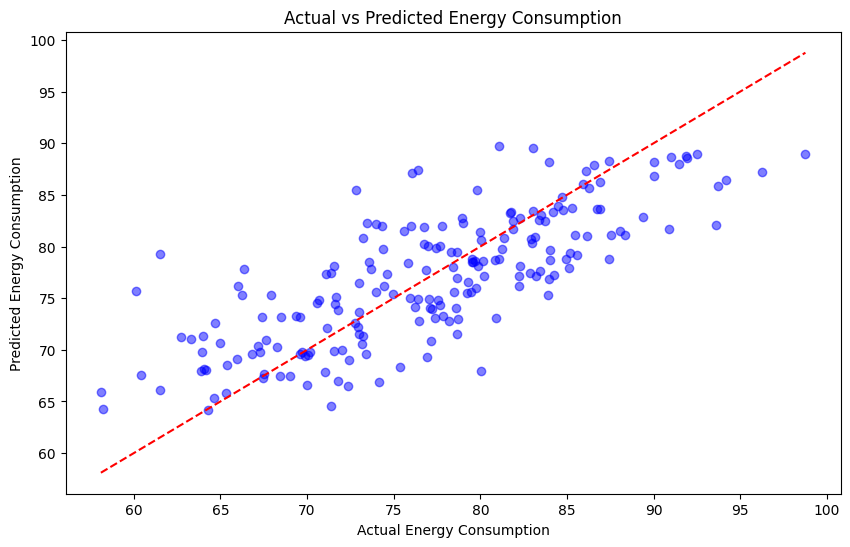

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()